## <center><font color='blue'>Trabalho 2 - Regressão Linear - TEIA 💻</font></center><br><font size=3>Aluna: Bárbara Lúcia</font>

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Configuring floats to not be printed in cientific notation
np.set_printoptions(formatter={'all':lambda x: str(x)})

In [88]:
class LRTrainer():
    
    
    def __init__(self, alfa=0.1, max_iterations=500, analitic=False, theta=None, convergence=None):
            
            self.alfa = alfa
            self.max_iterations = max_iterations
            self.analitic = analitic
            self.theta = theta
            self.convergence = convergence
            self._trained = False
            
    def fit(self, X, y):
        
        if self.analitic:
            
            # Verifying if the data matrix already has the 1's column 
            if ((len(np.unique(X[:, 0])) == 1) and (np.unique(X[:, 0]) == [1])):
                pass
            else:
                # adding the 1's column
                X = np.c_[np.ones(len(X)), X] 
            
            
            # Verifying the singularity of matrix
            sing = True
            
            if(len(X) == len(X[0])):   # square, so we can calculate the determinant
                if (np.linalg.det(X)) != 0:    # matrix is not singular
                    X = np.matrix(X)
                    y =  np.transpose(np.matrix(y))
                    self.theta = np.transpose(np.linalg.inv((np.transpose(X)*X))*np.dot(np.transpose(X), y))

                    sing = False
                    self._trained = True

            if(sing):    # matrix is singular
                X = np.matrix(X)
                y =  np.transpose(np.matrix(y))
                self.theta = np.transpose(np.linalg.pinv((np.transpose(X)*X))*np.transpose(X)*y)
            
                self._trained = True
            
            
            # Calculating train error
            erro = 0.0
        
            # Looping through lines of X
            for i in range(len(X)):
                erro += ((np.inner(X[i], self.theta) - y[i])**2)

            return (np.array(self.theta), float(erro)) 
        
        else:
            
            # Verifying if the data matrix already has the 1's column
            if ((len(np.unique(X[:, 0])) == 1) and (np.unique(X[:, 0]) == [1])):
                pass
            else:
                # adding the 1's column
                X = np.c_[np.ones(len(X)), X] 
                
            # Initializing parameters
            theta = np.zeros(len(X[0]))
        
            
            convergence = np.zeros(self.max_iterations)

            for i in range(self.max_iterations):
                soma = error = 0.0
                
                # Looping through lines of X
                for point, out in zip(X, y):

                    # Summing (prediction - y)
                    dif = np.inner(point, theta) - out
                    soma += dif * point
                    error += dif**2 
                    

                    
                # Updating theta
                theta = theta - (self.alfa)*(1/len(X))*soma
                error = (1/(2*len(X)))*error
                convergence[i] = error
            
            self.theta = theta
            self.conv = convergence
            self._trained = True
            return (theta, convergence)
        
        
    def predict(self, X, y=None):
        
        if not self._trained:
            raise RuntimeError("You must train classifer before predicting data!")
            
        # Verifying if the data matrix already has the 1's column 
        if ((len(np.unique(X[:, 0])) == 1) and (np.unique(X[:, 0]) == [1])):
            pass
        else:
            # adicionando as colunas com 1's
            X = np.c_[np.ones(len(X)), X] 

        pred = np.zeros(len(X))
        
        # Percorrendo linha a linha de X, ou seja, percorrendo as instâncias de dados
        for i in range(len(X)):
            pred[i] = np.inner(X[i], theta)
            
        if y is None:
            return pred
        else:
            return (pred, pred - y, sum((pred - y)**2))     
        
    def GD_error_graf(self):
        if self.analitic == True:
            print("The train was analitic, so there is not gradient descend error.")
            return None
        plt.figure(figsize=(14,9))
        plt.plot([i for i in range(self.max_iterations)], conv)
    

In [89]:
# Data dowloaded from https://archive.ics.uci.edu/ml/datasets/Container+Crane+Controller+Data+Set 

data = pd.read_csv('Container_Crane_Controller_Data_Set.csv', sep=';')
data

,Speed,Angle,Power
0,1,-5,0.3
1,2,5,0.3
2,3,-2,0.5
3,1,2,0.5
4,2,0,0.7
5,6,-5,0.5
6,7,5,0.5
7,6,-2,0.3
8,7,2,0.3
9,6,0,0.7


In [90]:
# Separating train and test

X_train = data[['Speed', 'Angle']][0:10].to_numpy()
y_train = data['Power'][0:10].to_numpy()

X_test = data[['Speed', 'Angle']][10:-1].to_numpy()
y_test = data['Power'][10:-1].to_numpy()

## Analítico

In [91]:
trainer = LRTrainer(analitic=True)
theta, erro_treino = trainer.fit(X_train, y_train)

print("Theta : ", theta, "\n\nErro de Treino Analítico : ", erro_treino)

Theta :  [[0.45708952940456377 0.0007098708769355741 -4.8956612202463376e-05]] 

Erro de Treino Analítico :  0.2239716051649226


In [92]:
pred, error, total_error = trainer.predict(X_test, y_test)
print("Erro de Teste Analítico : ", total_error)

Erro de Teste Analítico :  0.056171445001363465


## Gradiente Descendente

In [93]:
trainer = LRTrainer(alfa=0.001)
theta, conv = trainer.fit(X_train, y_train)

print("Theta : ", theta, "\n\nErro de Treino Gradiente Descendente : ", conv[-1])

Theta :  [0.06579230624780787 0.07297081122776464 -0.005105111044377687] 

Erro de Treino Gradiente Descendente :  0.03043458242402568


In [95]:
pred, error, total_error = trainer.predict(X_test, y_test)
print("Erro de Teste Gradiente Descendente : ", total_error)

Erro de Teste Gradiente Descendente :  0.44036583329504764


## Curva de erro do Gradiente Descendente

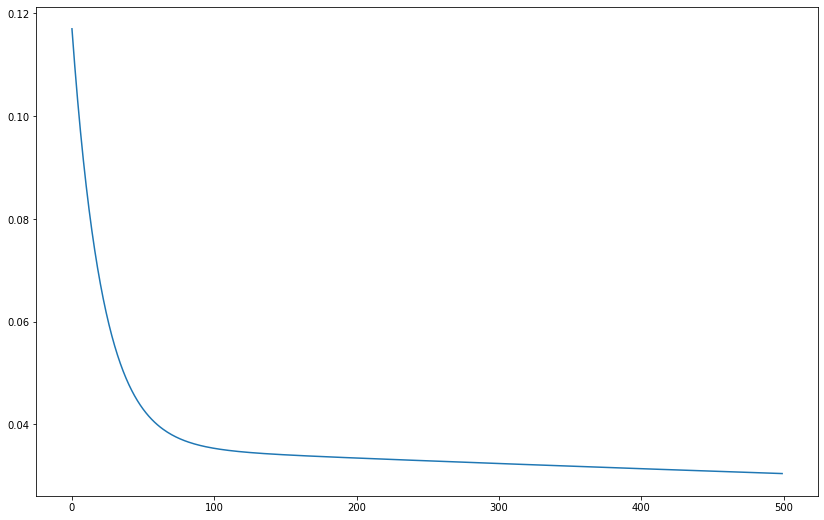

In [96]:
trainer.GD_error_graf()